In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import topologies.Slimfly as Slimfly
import topologies.DDF as DDF
import math

In [2]:
# list of prime number less than 100: 2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97 
# This should be enough for finding all slimfly configurations with less than 20k nodes
prime_numbers=[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97,
101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199	]


search_min=1  #lower bound of the search
search_max=200000 #upper bound of the search
print(f"Searching for slimfly configurations: (num_vertices, k'), Number of routers between {search_min} and {search_max}")

SF_configs=[]
for delta in [-1, 0, 1]:
    for prime in prime_numbers:
        power = 1
        while(1):
            q=pow(prime,power)
            num_vertices=q**2*2
            if(search_min >= num_vertices):
                power+=1
                continue
            if(num_vertices <= search_max ):
                if ((q-delta)%4==0):
                    kp=int((3*q-delta)/2)
                    print(f"slimfly configuration found: q={q}, delta={delta} ({num_vertices}, {kp})")
                    SF_configs.append((num_vertices, kp))
                power+=1
            else:
                break


Searching for slimfly configurations: (num_vertices, k'), Number of routers between 1 and 200000
slimfly configuration found: q=3, delta=-1 (18, 5)
slimfly configuration found: q=27, delta=-1 (1458, 41)
slimfly configuration found: q=243, delta=-1 (118098, 365)
slimfly configuration found: q=7, delta=-1 (98, 11)
slimfly configuration found: q=11, delta=-1 (242, 17)
slimfly configuration found: q=19, delta=-1 (722, 29)
slimfly configuration found: q=23, delta=-1 (1058, 35)
slimfly configuration found: q=31, delta=-1 (1922, 47)
slimfly configuration found: q=43, delta=-1 (3698, 65)
slimfly configuration found: q=47, delta=-1 (4418, 71)
slimfly configuration found: q=59, delta=-1 (6962, 89)
slimfly configuration found: q=67, delta=-1 (8978, 101)
slimfly configuration found: q=71, delta=-1 (10082, 107)
slimfly configuration found: q=79, delta=-1 (12482, 119)
slimfly configuration found: q=83, delta=-1 (13778, 125)
slimfly configuration found: q=103, delta=-1 (21218, 155)
slimfly configurat

In [3]:
SF_configs.sort()
display(SF_configs)

[(18, 5),
 (32, 6),
 (50, 7),
 (98, 11),
 (128, 12),
 (162, 13),
 (242, 17),
 (338, 19),
 (512, 24),
 (578, 25),
 (722, 29),
 (1058, 35),
 (1250, 37),
 (1458, 41),
 (1682, 43),
 (1922, 47),
 (2048, 48),
 (2738, 55),
 (3362, 61),
 (3698, 65),
 (4418, 71),
 (4802, 73),
 (5618, 79),
 (6962, 89),
 (7442, 91),
 (8192, 96),
 (8978, 101),
 (10082, 107),
 (10658, 109),
 (12482, 119),
 (13122, 121),
 (13778, 125),
 (15842, 133),
 (18818, 145),
 (20402, 151),
 (21218, 155),
 (22898, 161),
 (23762, 163),
 (25538, 169),
 (29282, 181),
 (31250, 187),
 (32258, 191),
 (32768, 192),
 (34322, 197),
 (37538, 205),
 (38642, 209),
 (44402, 223),
 (45602, 227),
 (49298, 235),
 (53138, 245),
 (55778, 251),
 (57122, 253),
 (59858, 259),
 (64082, 269),
 (65522, 271),
 (72962, 287),
 (74498, 289),
 (77618, 295),
 (79202, 299),
 (118098, 365),
 (131072, 384),
 (167042, 433)]

In [14]:
#DDF
DDF_configs=[]
search_min=0  #lower bound of the search
search_max=200000 #upper bound of the search
print(f"Searching for Dally Dragonfly configurations: (num_vertices, k'), Number of routers between {search_min} and {search_max}")
a=0

while 1:
    a+=2
    h=a//2
    p=a//2
    k=a+p+h-1
    g=a*h+1
    R=a*g
    if R<search_min:
        continue
    elif R>search_max:
        break
    else:
        print(f"DDF config found: ({R}, {k-p}), (a={a}, h=p={h}, k={k} g={g}, N={R*p})")
        DDF_configs.append((R*p, R, k-p))



Searching for Dally Dragonfly configurations: (num_vertices, k'), Number of routers between 0 and 200000
DDF config found: (6, 2), (a=2, h=p=1, k=3 g=3, N=6)
DDF config found: (36, 5), (a=4, h=p=2, k=7 g=9, N=72)
DDF config found: (114, 8), (a=6, h=p=3, k=11 g=19, N=342)
DDF config found: (264, 11), (a=8, h=p=4, k=15 g=33, N=1056)
DDF config found: (510, 14), (a=10, h=p=5, k=19 g=51, N=2550)
DDF config found: (876, 17), (a=12, h=p=6, k=23 g=73, N=5256)
DDF config found: (1386, 20), (a=14, h=p=7, k=27 g=99, N=9702)
DDF config found: (2064, 23), (a=16, h=p=8, k=31 g=129, N=16512)
DDF config found: (2934, 26), (a=18, h=p=9, k=35 g=163, N=26406)
DDF config found: (4020, 29), (a=20, h=p=10, k=39 g=201, N=40200)
DDF config found: (5346, 32), (a=22, h=p=11, k=43 g=243, N=58806)
DDF config found: (6936, 35), (a=24, h=p=12, k=47 g=289, N=83232)
DDF config found: (8814, 38), (a=26, h=p=13, k=51 g=339, N=114582)
DDF config found: (11004, 41), (a=28, h=p=14, k=55 g=393, N=154056)
DDF config found:

In [15]:
DDF_configs.sort()
display(DDF_configs)

[(6, 6, 3),
 (72, 36, 7),
 (342, 114, 11),
 (1056, 264, 15),
 (2550, 510, 19),
 (5256, 876, 23),
 (9702, 1386, 27),
 (16512, 2064, 31),
 (26406, 2934, 35),
 (40200, 4020, 39),
 (58806, 5346, 43),
 (83232, 6936, 47),
 (114582, 8814, 51),
 (154056, 11004, 55),
 (202950, 13530, 59),
 (262656, 16416, 63),
 (334662, 19686, 67),
 (420552, 23364, 71),
 (522006, 27474, 75),
 (640800, 32040, 79),
 (778806, 37086, 83),
 (937992, 42636, 87),
 (1120422, 48714, 91),
 (1328256, 55344, 95),
 (1563750, 62550, 99),
 (1829256, 70356, 103),
 (2127222, 78786, 107),
 (2460192, 87864, 111),
 (2830806, 97614, 115),
 (3241800, 108060, 119),
 (3696006, 119226, 123),
 (4196352, 131136, 127),
 (4745862, 143814, 131),
 (5347656, 157284, 135),
 (6004950, 171570, 139),
 (6721056, 186696, 143)]

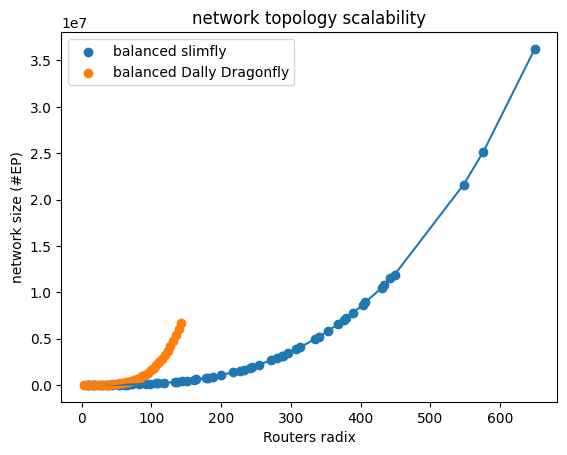

In [6]:
#plot slimfly
SF_configs.sort()
_x=[] # router radix
_y=[] # network EPs (consider the 'full-bandwidth EP' in slimfly paper)
for config in SF_configs:
    _x.append(config[1]*3/2)
    _y.append(config[0]*math.ceil(config[1]/2))
plt.scatter(_x, _y, label='balanced slimfly')
plt.plot(_x, _y)

#plot DDF
DDF_configs.sort()
_x=[] # router radix
_y=[] # network EPs (consider the 'full-bandwidth EP' in slimfly paper)
for config in DDF_configs:
    _x.append(config[2])
    _y.append(config[0])
plt.scatter(_x, _y, label='balanced Dally Dragonfly')
plt.plot(_x, _y)

# Add labels and title
plt.xlabel('Routers radix')
plt.ylabel('network size (#EP)')
plt.title('network topology scalability')
plt.legend(loc='upper left')
# plt.yscale("log")
plt.show()

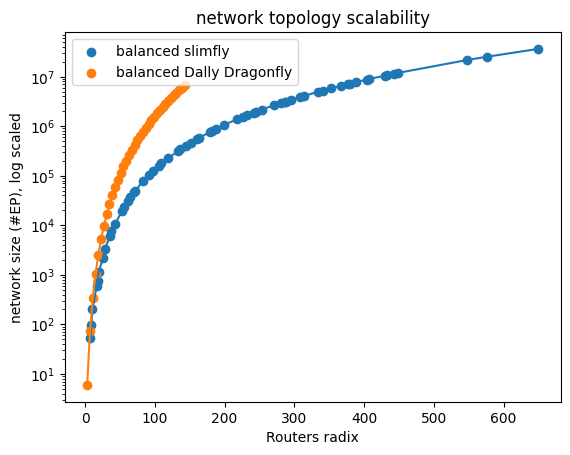

In [7]:
#plot slimfly
SF_configs.sort()
_x=[] # router radix
_y=[] # network EPs (consider the 'full-bandwidth EP' in slimfly paper)
for config in SF_configs:
    _x.append(config[1]*3/2)
    _y.append(config[0]*math.ceil(config[1]/2))
plt.scatter(_x, _y, label='balanced slimfly')
plt.plot(_x, _y)

#plot DDF
DDF_configs.sort()
_x=[] # router radix
_y=[] # network EPs (consider the 'full-bandwidth EP' in slimfly paper)
for config in DDF_configs:
    _x.append(config[2])
    _y.append(config[0])
plt.scatter(_x, _y, label='balanced Dally Dragonfly')
plt.plot(_x, _y)

# Add labels and title
plt.xlabel('Routers radix')
plt.ylabel('network size (#EP), log scaled')
plt.title('network topology scalability')
plt.legend(loc='upper left')
plt.yscale("log")
plt.show()

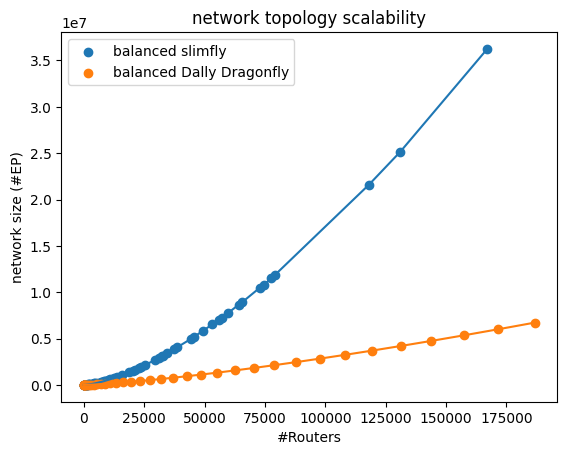

In [8]:
#plot slimfly
SF_configs.sort()
_x=[] # router radix
_y=[] # network EPs (consider the 'full-bandwidth EP' in slimfly paper)
for config in SF_configs:
    _x.append(config[0])
    _y.append(config[0]*math.ceil(config[1]/2))
plt.scatter(_x, _y, label='balanced slimfly')
plt.plot(_x, _y)

#plot DDF
DDF_configs.sort()
_x=[] # router radix
_y=[] # network EPs (consider the 'full-bandwidth EP' in slimfly paper)
for config in DDF_configs:
    _x.append(config[1])
    _y.append(config[0])
plt.scatter(_x, _y, label='balanced Dally Dragonfly')
plt.plot(_x, _y)

# Add labels and title
plt.xlabel('#Routers')
plt.ylabel('network size (#EP)')
plt.title('network topology scalability')
plt.legend(loc='upper left')
# plt.yscale("log")
plt.show()

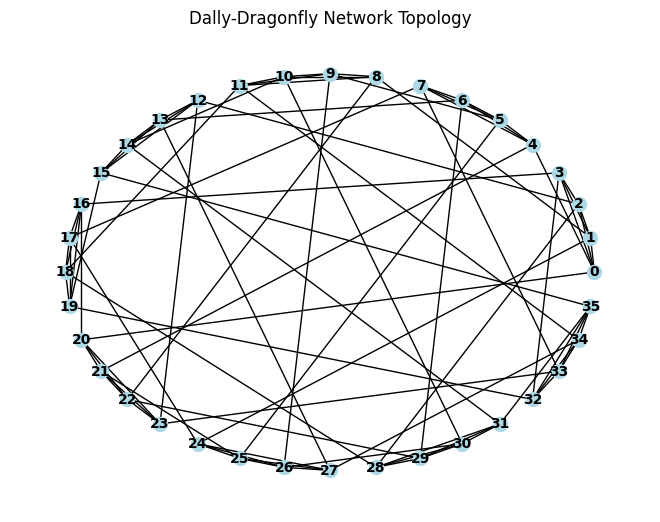

In [9]:
ddf=DDF.DDFtopo(36,5)
G=ddf.nx_graph

# Draw the graph
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_size=100, node_color='lightblue', font_size=10, font_weight='bold')
plt.title("Dally-Dragonfly Network Topology")
plt.show()

In [10]:
import globals as gl

gl.calculate_data_shortest_paths(ddf, 36)

calculation done for 36 with shortest paths routing


({'diameter': 3,
  'ave_path_length_statistics': [1.0, 2.342857142857143, 3.0],
  'num_paths_statistics': [1, 1.542857142857143, 4],
  'link_load_statistics': [12.166666666666666, 16.4, 23.083333333333336]},
 [(0, 1),
  (0, 2),
  (0, 3),
  (0, 4),
  (0, 20),
  (1, 2),
  (1, 3),
  (1, 8),
  (1, 24),
  (2, 3),
  (2, 12),
  (2, 28),
  (3, 16),
  (3, 32),
  (4, 5),
  (4, 6),
  (4, 7),
  (4, 21),
  (5, 6),
  (5, 7),
  (5, 9),
  (5, 25),
  (6, 7),
  (6, 13),
  (6, 29),
  (7, 17),
  (7, 33),
  (8, 9),
  (8, 10),
  (8, 11),
  (8, 22),
  (9, 10),
  (9, 11),
  (9, 26),
  (10, 11),
  (10, 14),
  (10, 30),
  (11, 18),
  (11, 34),
  (12, 13),
  (12, 14),
  (12, 15),
  (12, 23),
  (13, 14),
  (13, 15),
  (13, 27),
  (14, 15),
  (14, 31),
  (15, 19),
  (15, 35),
  (16, 17),
  (16, 18),
  (16, 19),
  (16, 20),
  (17, 18),
  (17, 19),
  (17, 24),
  (18, 19),
  (18, 28),
  (19, 32),
  (20, 21),
  (20, 22),
  (20, 23),
  (21, 22),
  (21, 23),
  (21, 25),
  (22, 23),
  (22, 29),
  (23, 33),
  (24, 25),
  

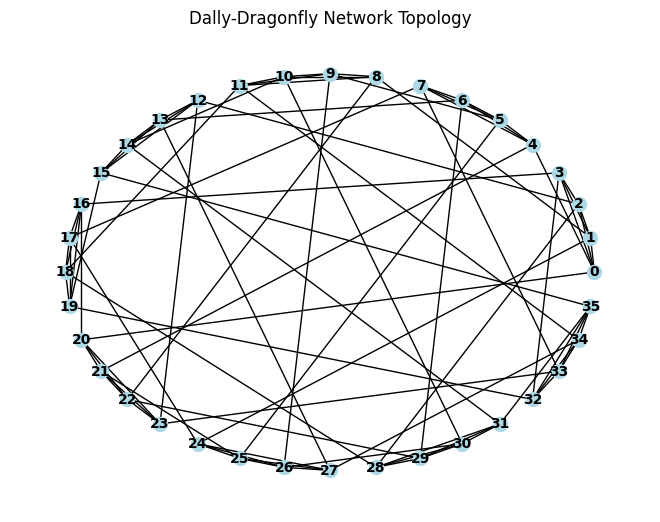

In [11]:
sf=Slimfly.Slimflytopo(32,6)
G=ddf.nx_graph

# Draw the graph
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_size=100, node_color='lightblue', font_size=10, font_weight='bold')
plt.title("Dally-Dragonfly Network Topology")
plt.show()

In [12]:
import globals as gl

gl.calculate_data_shortest_paths(sf, 32)

calculation done for 32 with shortest paths routing


({'diameter': 2,
  'ave_path_length_statistics': [1.0, 1.8064516129032258, 2.0],
  'num_paths_statistics': [1, 1.1612903225806452, 2],
  'link_load_statistics': [6.0, 9.333333333333334, 10.0]},
 [(0, 1),
  (0, 3),
  (0, 24),
  (0, 28),
  (0, 16),
  (0, 20),
  (1, 29),
  (1, 17),
  (1, 25),
  (1, 2),
  (1, 21),
  (3, 2),
  (3, 23),
  (3, 27),
  (3, 19),
  (3, 31),
  (24, 6),
  (24, 11),
  (24, 13),
  (24, 26),
  (24, 25),
  (28, 7),
  (28, 9),
  (28, 14),
  (28, 29),
  (28, 30),
  (16, 4),
  (16, 8),
  (16, 12),
  (16, 17),
  (16, 18),
  (20, 5),
  (20, 10),
  (20, 15),
  (20, 22),
  (20, 21),
  (29, 6),
  (29, 8),
  (29, 15),
  (29, 31),
  (17, 5),
  (17, 9),
  (17, 13),
  (17, 19),
  (25, 7),
  (25, 10),
  (25, 12),
  (25, 27),
  (2, 26),
  (2, 30),
  (2, 18),
  (2, 22),
  (21, 4),
  (21, 11),
  (21, 14),
  (21, 23),
  (26, 4),
  (26, 9),
  (26, 15),
  (26, 27),
  (30, 5),
  (30, 11),
  (30, 12),
  (30, 31),
  (18, 6),
  (18, 10),
  (18, 14),
  (18, 19),
  (22, 7),
  (22, 8),
  (22, 1

In [13]:
# # unipath routing in ddf

# vertices = G.nodes()
# vertex_pairs = [(v1, v2) for v1 in vertices for v2 in vertices if v1 != v2]
# paths_dict={}
# routers_per_group=4

# for (v1, v2) in vertex_pairs:
#     path=[]
#     if G.nodes[v1]["group"]==G.nodes[v2]["group"]: # in the same group
#         path=[v1, v2]
#         assert(G.has_edge(v1, v2))
#     else: # not in the same group
#         if G.nodes[v2]["group"] in G.nodes[v1]["adjacency"].keys():
#             adjacent_r=G.nodes[v1]["adjacency"][G.nodes[v2]["group"]]
#             assert(G.has_edge(v1, adjacent_r))
#             if adjacent_r == v2:
#                 path=[v1, v2]
#             else:
#                 assert(G.nodes[v2]["group"]==G.nodes[adjacent_r]["group"] and G.has_edge(adjacent_r, v2))
#                 path=[v1, adjacent_r, v2]
#         else: #route to the correct router in the same group 
#             group_id=G.nodes[v1]["group"]
#             routers_in_group = list(range(group_id * routers_per_group, (group_id + 1) * routers_per_group))
#             next_router=-1
#             for r in routers_in_group:
#                 if r != v1:
#                     if G.nodes[v2]["group"] in G.nodes[r]["adjacency"].keys():
#                         next_router=r
#                         break
#             adjacent_r=G.nodes[next_router]["adjacency"][G.nodes[v2]["group"]]
#             if adjacent_r == v2:
#                 path=[v1, next_router, adjacent_r]
#             else:
#                 assert(G.nodes[v2]["group"]==G.nodes[adjacent_r]["group"] and G.has_edge(adjacent_r, v2))
#                 path=[v1, next_router, adjacent_r, v2]
#     paths_dict[(v1, v2)]=path
